In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data = pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [3]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.shape



(1436, 38)

In [5]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
data.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis = 1,inplace = True)

In [7]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [9]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8f487fa790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f487fadf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8f487fa4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f48817310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f488175e0>],
 'means': []}

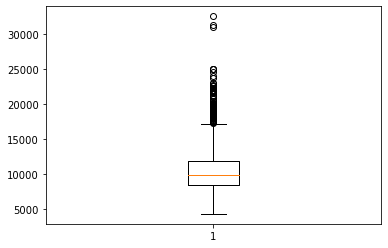

In [10]:
box = plt.boxplot(data['Price'])
box

In [11]:
[item.get_ydata() for item in box['fliers']]

[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 24950, 22950,
        24990, 21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750,
        17950, 18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500,
        24500, 19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900,
        19750, 19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950,
        20950, 20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950,
        18950, 19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795,
        18245, 18950])]

In [12]:
(data['Price']>=30000)

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Name: Price, Length: 1436, dtype: bool

In [13]:
data[data['Price']>=30000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [14]:
data.drop([109,110,111],axis=0,inplace = True)

In [15]:
data[data["Price"]>=30000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [16]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.881019,-0.570488,0.314740,0.118685,0.179630,0.067168,0.171866,0.540866
Age_08_04,-0.881019,1.000000,0.501027,-0.152358,-0.093110,-0.143756,-0.006237,-0.176214,-0.458203
KM,-0.570488,0.501027,1.000000,-0.331357,0.106863,-0.032560,0.014549,0.304209,0.000262
HP,0.314740,-0.152358,-0.331357,1.000000,0.033903,0.090554,0.209972,-0.315989,0.079125
cc,0.118685,-0.093110,0.106863,0.033903,1.000000,0.077949,0.014938,0.304685,0.341990
Doors,0.179630,-0.143756,-0.032560,0.090554,0.077949,1.000000,-0.160019,0.101795,0.306349
Gears,0.067168,-0.006237,0.014549,0.209972,0.014938,-0.160019,1.000000,-0.004151,0.024479
Quarterly_Tax,0.171866,-0.176214,0.304209,-0.315989,0.304685,0.101795,-0.004151,1.000000,0.601441
Weight,0.540866,-0.458203,0.000262,0.079125,0.341990,0.306349,0.024479,0.601441,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8f7b3ebbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f7b3fb0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8f7b3eb8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f7b3fb640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f7b3fb910>],
 'means': []}

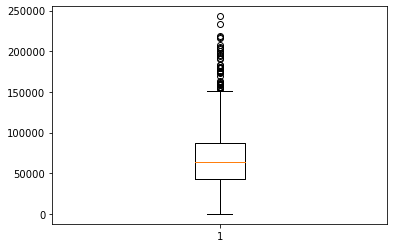

In [17]:
box1 = plt.boxplot(data['KM'])
box1

In [18]:
data[data['KM']>=230000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
186,6950,43,243000,69,1900,3,5,185,1110
1044,5900,73,232940,72,2000,5,5,40,1172


In [19]:
data.drop([186,1044],axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8f487fa790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f487fadf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8f487fa4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f48817310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f488175e0>],
 'means': []}

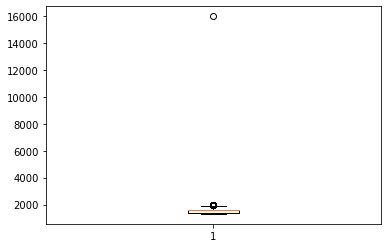

In [20]:
box2 = plt.boxplot(data['cc'])
box

In [21]:
[item.get_ydata() for item in box2['fliers']]

[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  1975,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000])]

In [22]:
data[data['cc']>=16000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [23]:
data.drop(80, axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8f597e8670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8f597e8c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8f597e83a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8f597f51f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8f597f54c0>],
 'means': []}

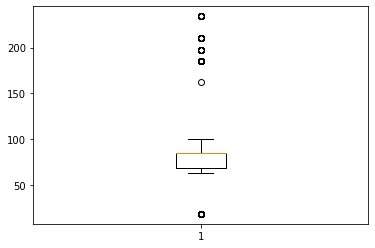

In [24]:
box3 = plt.boxplot(data['Quarterly_Tax'])
box3

In [25]:
data[data['Quarterly_Tax']<50]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
18,16750,24,25563,110,1600,3,5,19,1065
30,12950,29,9750,97,1400,3,5,19,1100
65,16950,26,32181,110,1600,5,5,19,1075
126,15950,20,36000,110,1600,5,5,19,1075
129,15850,13,33477,110,1600,5,5,19,1075
...,...,...,...,...,...,...,...,...,...
1387,7450,78,52287,110,1600,5,5,19,1114
1388,8750,75,52000,110,1600,5,5,19,1075
1416,8950,79,40093,110,1600,5,5,19,1114
1423,7950,80,35821,86,1300,3,5,19,1015


In [26]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.881824,-0.570948,0.312215,0.147153,0.178857,0.067364,0.173002,0.543217
Age_08_04,-0.881824,1.000000,0.507344,-0.152197,-0.122252,-0.144120,-0.006391,-0.174580,-0.458746
KM,-0.570948,0.507344,1.000000,-0.323599,0.306264,-0.031747,0.015545,0.305482,-0.006662
HP,0.312215,-0.152197,-0.323599,1.000000,0.052671,0.090292,0.210280,-0.315815,0.082772
cc,0.147153,-0.122252,0.306264,0.052671,1.000000,0.122752,0.042162,0.678736,0.659866
Doors,0.178857,-0.144120,-0.031747,0.090292,0.122752,1.000000,-0.160110,0.104625,0.305299
Gears,0.067364,-0.006391,0.015545,0.210280,0.042162,-0.160110,1.000000,-0.004003,0.025057
Quarterly_Tax,0.173002,-0.174580,0.305482,-0.315815,0.678736,0.104625,-0.004003,1.000000,0.604855
Weight,0.543217,-0.458746,-0.006662,0.082772,0.659866,0.305299,0.025057,0.604855,1.000000


In [27]:
data.duplicated().sum()

1

In [28]:
duplicate = data[data.duplicated()]
duplicate

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [29]:
data.drop(113,axis = 0,inplace = True)
data.reset_index()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1424,1431,7500,69,20544,86,1300,3,5,69,1025
1425,1432,10845,72,19000,86,1300,3,5,69,1015
1426,1433,8500,71,17016,86,1300,3,5,69,1015
1427,1434,7250,70,16916,86,1300,3,5,69,1015


In [30]:
data.duplicated().sum()

0

In [31]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [32]:
model = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1105.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:27   Log-Likelihood:                -12266.
No. Observations:                1429   AIC:                         2.455e+04
Df Residuals:                    1420   BIC:                         2.460e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4155.8364   1409.044     -2.949      0.003   -6919.869   -1391.804
Age_08_04      -122.7470      2.565    -47.863      0.000    -127.778    -117.716
KM               -0.0172      0.001    -13.354      0.000      -0.020      -0.015
HP               38.1248      2.898     13.154      0.000      32.439      43.810
cc               -2.1363      0.311     -6.861      0.000      -2.747      -1.525
Doors            -7.2375     38.959     -0.186      0.853     -83.661      69.186
Gears           563.5367    190.709      2.955      0.003     189.435     937.639
Quarterly_Tax     8.0722      1.441      5.603      0.000       5.246      10.898
Weight           17.6120      1.177     14.961      0.000      15.303      19.921
==============================================================================
Omnibus:                      170.912   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1355.018
Skew:                          -0.236   Prob(JB):                    5.77e-295
Kurtosis:                       7.747   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# doors p value is greater than 0.005 so we plot cook distance for chacking which point is more influence 
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c


array([6.54957610e-03, 3.45887855e-03, 4.66194961e-03, ...,
       2.08577231e-06, 9.20326555e-04, 9.37646088e-03])

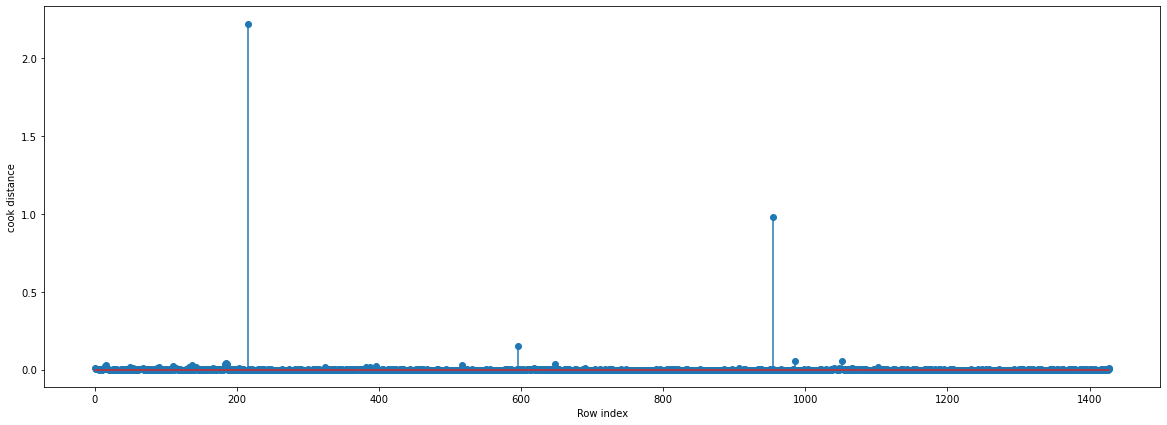

In [37]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("cook distance")
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(215, 2.2207650983707614)

In [39]:
data.drop(215,axis=0,inplace = True)

In [40]:
model1 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()

In [41]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1108.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:05:27   Log-Likelihood:                -12256.
No. Observations:                1428   AIC:                         2.453e+04
Df Residuals:                    1419   BIC:                         2.458e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4093.5340   1407.707     -2.908      0.004   -6854.944   -1332.124
Age_08_04      -123.0160      2.565    -47.963      0.000    -128.047    -117.985
KM               -0.0171      0.001    -13.291      0.000      -0.020      -0.015
HP               38.2182      2.895     13.200      0.000      32.539      43.898
cc               -2.1327      0.311     -6.857      0.000      -2.743      -1.523
Doors            -5.0903     38.927     -0.131      0.896     -81.451      71.270
Gears           562.1157    190.486      2.951      0.003     188.450     935.781
Quarterly_Tax     8.0638      1.439      5.604      0.000       5.241      10.887
Weight           17.5490      1.176     14.920      0.000      15.242      19.856
==============================================================================
Omnibus:                      169.980   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.964
Skew:                          -0.232   Prob(JB):                    8.81e-293
Kurtosis:                       7.732   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
model1_influence = model1.get_influence()
(c1,_) = model1_influence.cooks_distance
c1

array([6.56593270e-03, 3.47550451e-03, 4.67081423e-03, ...,
       1.64516548e-06, 9.14058769e-04, 9.34769059e-03])

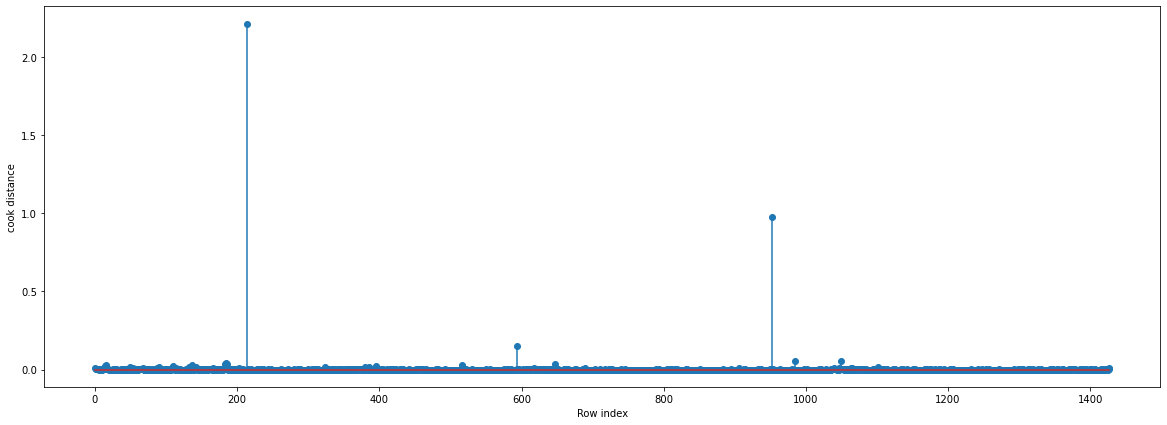

In [43]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)),np.round(c1,3))
plt.xlabel("Row index")
plt.ylabel("cook distance")
plt.show()

In [47]:
(np.argmax(c1),np.max(c1))

(214, 2.215924418128068)

In [48]:
data.drop(214,axis = 0,inplace = True)

In [49]:
model2 = sn.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = data).fit()

In [50]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1108.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:13:03   Log-Likelihood:                -12247.
No. Observations:                1427   AIC:                         2.451e+04
Df Residuals:                    1418   BIC:                         2.456e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4087.4434   1407.781     -2.903      0.004   -6849.001   -1325.886
Age_08_04      -123.0433      2.565    -47.969      0.000    -128.075    -118.012
KM               -0.0171      0.001    -13.299      0.000      -0.020      -0.015
HP               38.2220      2.895     13.201      0.000      32.542      43.902
cc               -2.1297      0.311     -6.847      0.000      -2.740      -1.520
Doors            -6.5926     38.962     -0.169      0.866     -83.021      69.836
Gears           560.1282    190.506      2.940      0.003     186.424     933.833
Quarterly_Tax     8.1242      1.441      5.640      0.000       5.298      10.950
Weight           17.5517      1.176     14.921      0.000      15.244      19.859
==============================================================================
Omnibus:                      170.439   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1349.383
Skew:                          -0.235   Prob(JB):                    9.67e-294
Kurtosis:                       7.741   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
data.drop("Doors",axis = 1,inplace = True)

In [52]:
model3 = sn.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = data).fit()

In [53]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:14:35   Log-Likelihood:                -12247.
No. Observations:                1427   AIC:                         2.451e+04
Df Residuals:                    1419   BIC:                         2.455e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4089.6645   1407.238     -2.906      0.004   -6850.155   -1329.174
Age_08_04      -123.0482      2.564    -47.990      0.000    -128.078    -118.019
KM               -0.0171      0.001    -13.325      0.000      -0.020      -0.015
HP               38.1735      2.880     13.254      0.000      32.524      43.823
cc               -2.1245      0.309     -6.866      0.000      -2.731      -1.518
Gears           566.4329    186.763      3.033      0.002     200.072     932.794
Quarterly_Tax     8.1280      1.440      5.645      0.000       5.304      10.953
Weight           17.4970      1.131     15.477      0.000      15.279      19.715
==============================================================================
Omnibus:                      169.095   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1328.877
Skew:                          -0.231   Prob(JB):                    2.74e-289
Kurtosis:                       7.705   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""